# Our objectives:

## Libraries and Dataset

In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

print('Imported all libraries')

Imported all libraries


In [4]:
dataset_path = 'South_Asian_DevData.csv'
development_dataset = pd.read_csv(dataset_path)
print('Dataset csv name:', dataset_path)

Dataset csv name: South_Asian_DevData.csv


# Let's see first how our database is structured

In [6]:
development_dataset.head()

,Country,Year,GDP (current US$),GDP growth (annual %),GDP per capita (current US$),"Unemployment, total (% of total labor force) (modeled ILO estimate)","Inflation, consumer prices (annual %)","Foreign direct investment, net inflows (% of GDP)",Trade (% of GDP),Gini index,...,Renewable energy consumption (% of total final energy consumption),Forest area (% of land area),Control of Corruption: Percentile Rank,Political Stability and Absence of Violence/Terrorism: Estimate,Regulatory Quality: Estimate,Rule of Law: Estimate,Voice and Accountability: Estimate,Individuals using the Internet (% of population),Research and development expenditure (% of GDP),High-technology exports (% of manufactured exports)
0,Afghanistan,2000,3.521418e+09,NaN,180.188369,7.955,NaN,0.004828,NaN,NaN,...,45,1.852781994,4.787233829,-2.438968897,-2.080252647,-1.780660748,-2.031417131,..,..,..
1,Afghanistan,2001,2.813572e+09,-9.431974,142.903364,7.958,NaN,0.024169,NaN,NaN,...,45.6,1.852781994,..,..,..,..,..,0.00472257,..,..
2,Afghanistan,2002,3.825701e+09,28.600001,182.174038,7.939,NaN,1.306950,NaN,NaN,...,37.8,1.852781994,4.761904716,-2.035033703,-1.81154573,-1.673473239,-1.433421016,0.0045614,..,..
3,Afghanistan,2003,4.520947e+09,8.832278,199.643226,7.922,NaN,1.278493,NaN,NaN,...,36.7,1.852781994,4.761904716,-2.198372364,-1.463107824,-1.5582937,-1.177571177,0.0878913,..,..
4,Afghanistan,2004,5.224897e+09,1.414118,221.830531,7.914,NaN,3.577104,NaN,NaN,...,44.2,1.852781994,6.403940678,-2.295682192,-1.511548996,-1.693925261,-1.203033924,0.105809,..,..


### Which countries are represented?

In [8]:
countries_list = development_dataset['Country'].unique()
countries_list

array(['Afghanistan', 'Bhutan', 'Bangladesh', 'India', 'Maldives',
       'Sri Lanka', 'Nepal', 'Pakistan'], dtype=object)

### Our database should be mostly numbers, we should check the dtypes

In [10]:
development_dataset.dtypes

Country                                                                        object
Year                                                                            int64
GDP (current US$)                                                             float64
GDP growth (annual %)                                                         float64
GDP per capita (current US$)                                                  float64
Unemployment, total (% of total labor force) (modeled ILO estimate)           float64
Inflation, consumer prices (annual %)                                         float64
Foreign direct investment, net inflows (% of GDP)                             float64
Trade (% of GDP)                                                              float64
Gini index                                                                    float64
Population, total                                                               int64
Population growth (annual %)                          

### Percentage of values missing, also e should be careful as we have missing values simbolized both as the default 'NaN' and '..'
Let's use numpy and replace all '..' with NaNs

In [12]:
development_dataset.replace('..', np.nan, inplace=True)
missing_count = development_dataset.isnull().sum().sum()
total_cells = np.product(development_dataset.shape)
total_missing_cells = (missing_count / total_cells) * 100
print('%.2f' %total_missing_cells, '%')

15.61 %


## Our dataset seems to be in need of cleaning and preprocessing
    1. We should convert all objects in floats except for [Country]
    2. Handle all missing values which amount to almost 16% of our database

### 1. We should convert all objects in floats except for [Country]

In [15]:
for column in development_dataset.columns[1:]:
    development_dataset[column] = pd.to_numeric(development_dataset[column], errors='raise')
development_dataset.dtypes

Country                                                                        object
Year                                                                            int64
GDP (current US$)                                                             float64
GDP growth (annual %)                                                         float64
GDP per capita (current US$)                                                  float64
Unemployment, total (% of total labor force) (modeled ILO estimate)           float64
Inflation, consumer prices (annual %)                                         float64
Foreign direct investment, net inflows (% of GDP)                             float64
Trade (% of GDP)                                                              float64
Gini index                                                                    float64
Population, total                                                               int64
Population growth (annual %)                          

### 2. Let's see where are our errors and to either average them or leave them

In [17]:
development_dataset.isnull().sum()

Country                                                                         0
Year                                                                            0
GDP (current US$)                                                               2
GDP growth (annual %)                                                           3
GDP per capita (current US$)                                                    2
Unemployment, total (% of total labor force) (modeled ILO estimate)             0
Inflation, consumer prices (annual %)                                           9
Foreign direct investment, net inflows (% of GDP)                               5
Trade (% of GDP)                                                               51
Gini index                                                                    150
Population, total                                                               0
Population growth (annual %)                                                    0
Poverty headcoun

### We might find more insight in a per-country basis
    1. For GDP we might be able to average between year before and after
    2. Trade (%) and High-technology export are very important factors that we might not be able to use in our analysis
    3. Gini index, Poverty headcount is very important for wealth disparity
    4. We might not be able to analyze education, research expenditure effects on South Asia developmental growth
    5. Missing values in political areas
    6. Green policies with development

In [50]:
#development_dataset.groupby(['Country'])['Gini index'].max()

Text(0.5, 1.0, 'Prova')

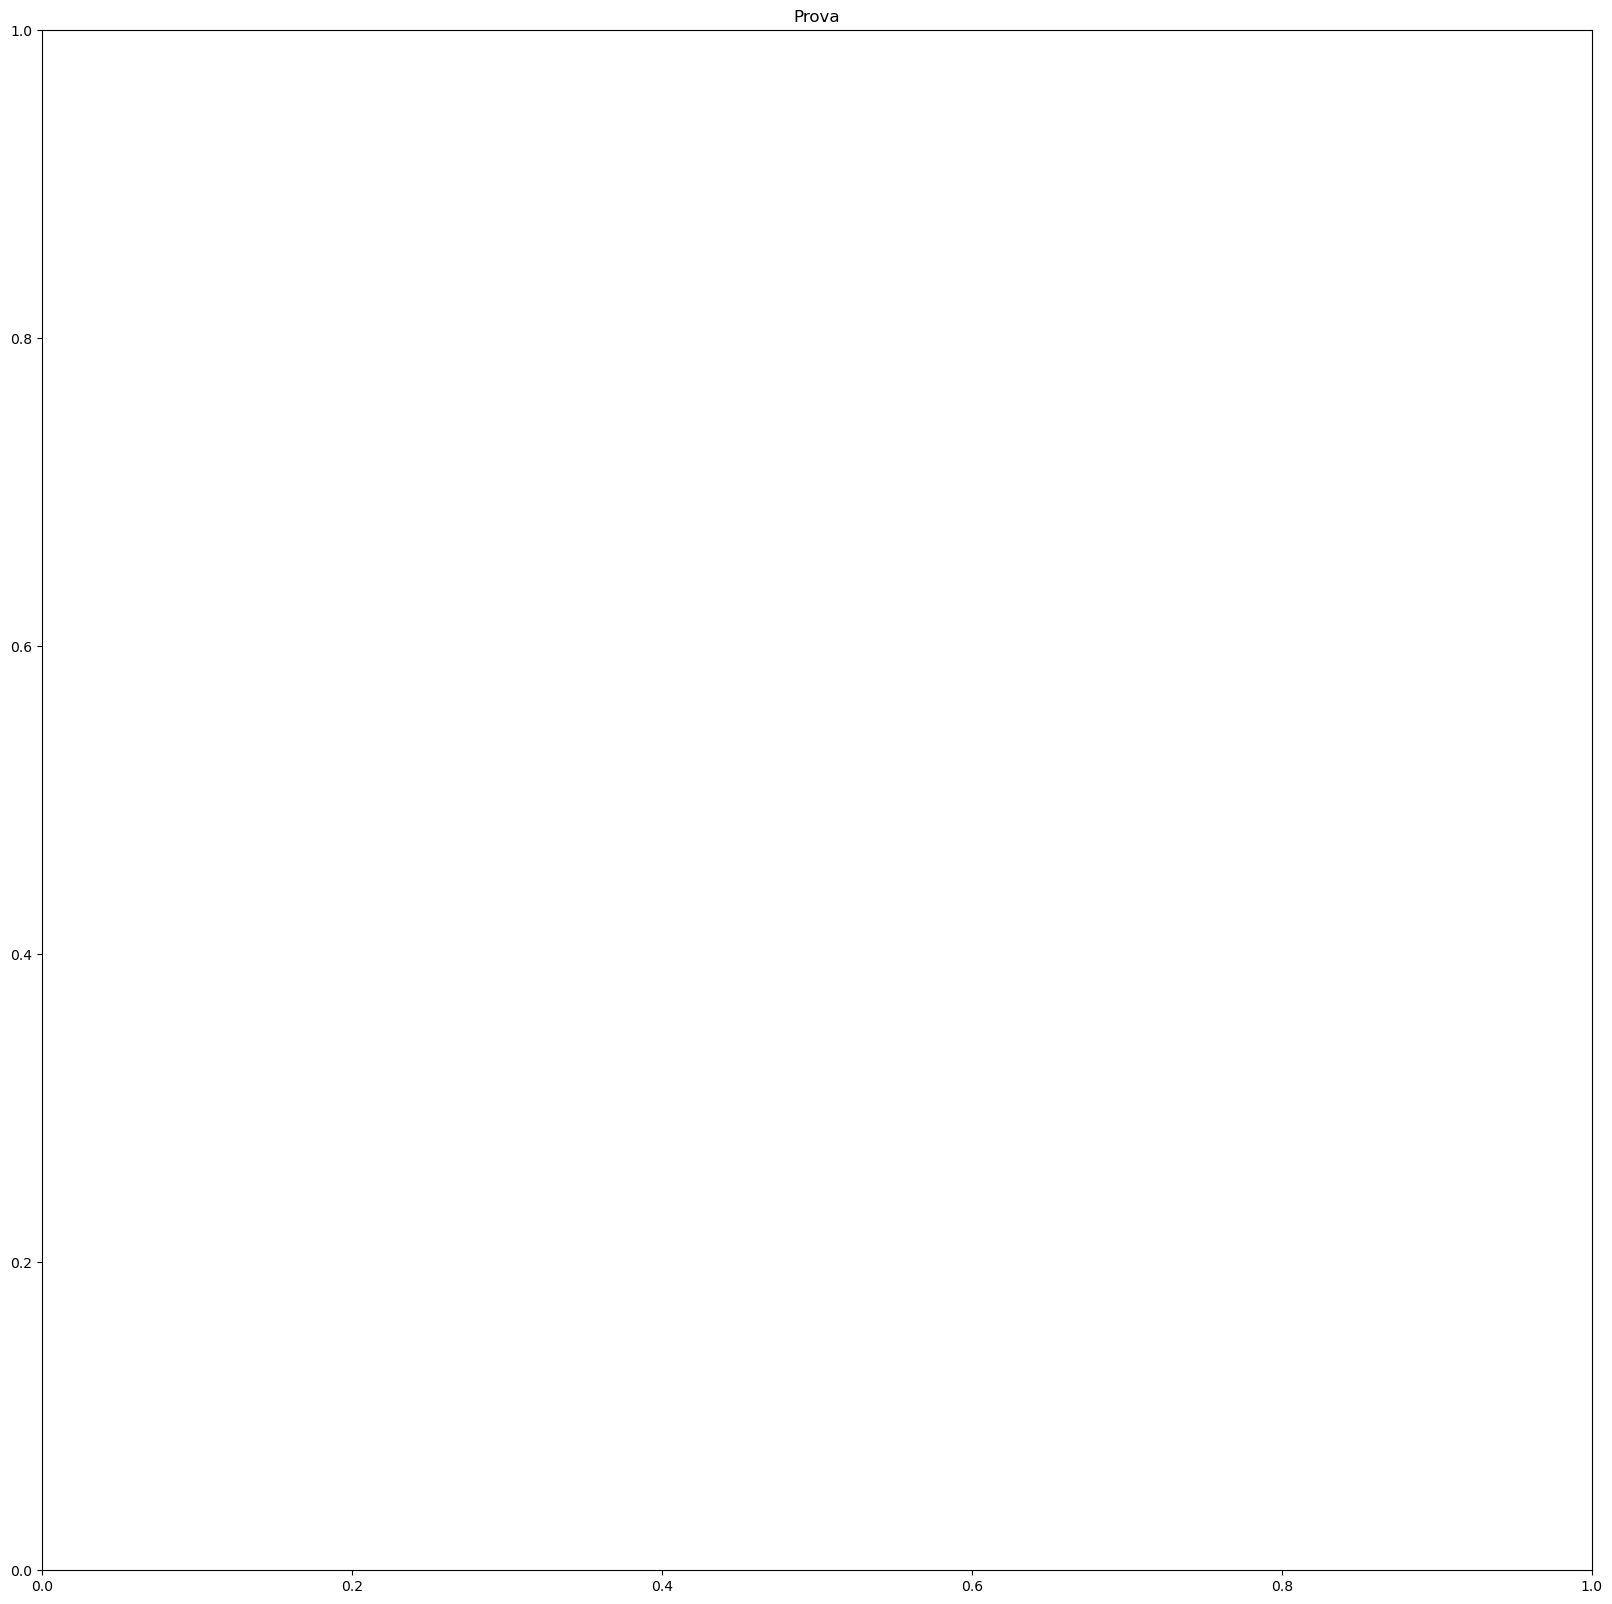

In [70]:
plt.figure(figsize=(20,20))
plt.title('Prova')
#sns.heatmap(x=development_dataset.groupby(['Country']).index, y=development_dataset['GDP (current US$)'])